In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
overall_folder_path = '../../graphic_development_files/Wood/prod_staging/squares/'

In [3]:
board_img = cv2.imread('../../graphic_development_files/Wood/checkered_full_board.png')
legal_highlight = cv2.imread('../../graphic_development_files/Wood/legal_highlight.png', -1)
check_highlight = cv2.imread('../../graphic_development_files/Wood/check_highlight.png', -1)
misc_highlight = cv2.imread('../../graphic_development_files/Wood/misc_highlight.png', -1)

In [4]:
# Function to overlay highlight on a square
def overlay_image(square, highlight):
    alpha = highlight[:, :, 3] / 255.0
    result = square.copy()
    for c in range(0, 3):
        result[:, :, c] = alpha * highlight[:, :, c] + (1 - alpha) * square[:, :, c]
    return result

# Function to save squares
def save_square(square, row_name, col, perspective, highlight_name=''):
    folder_name = f"{overall_folder_path}{perspective}/{highlight_name}_squares/" if highlight_name else f"{overall_folder_path}{perspective}/base_squares/"
    os.makedirs(folder_name, exist_ok=True)
    cv2.imwrite(f'{folder_name}{row_name}{col}.png', square)

In [5]:
# Split the board and save squares
square_size = board_img.shape[0] // 8
for row in range(8):
    for col in range(8):
        square = board_img[row*square_size:(row+1)*square_size, col*square_size:(col+1)*square_size]

        # Save for white perspective
        row_name_white = chr(97 + col) # 'a', 'b', ..., 'h'
        save_square(square, row_name_white, 8-row, 'white_perspective')

        # Save for black perspective (reversed)
        row_name_black = chr(104 - col) # 'h', 'g', ..., 'a'
        save_square(square, row_name_black, row+1, 'black_perspective')
        
        # Overlay highlights and save
        for highlight, highlight_name in [(legal_highlight, 'legal_move_highlight'), 
                                          (check_highlight, 'check_highlight'), 
                                          (misc_highlight, 'misc_highlight')]:
            highlighted_square = overlay_image(square, highlight)
            
            # Save for white perspective
            save_square(highlighted_square, row_name_white, 8-row, 'white_perspective', highlight_name)

            # Save for black perspective (reversed)
            save_square(highlighted_square, row_name_black, row+1, 'black_perspective', highlight_name)

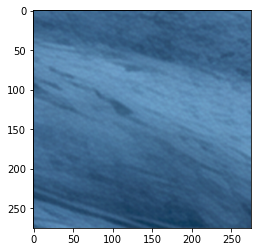

In [6]:
plt.imshow(square)